<a href="https://colab.research.google.com/github/maurofama99/c-frames/blob/main/evaluation/cframes_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Libraries import

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Single buffer

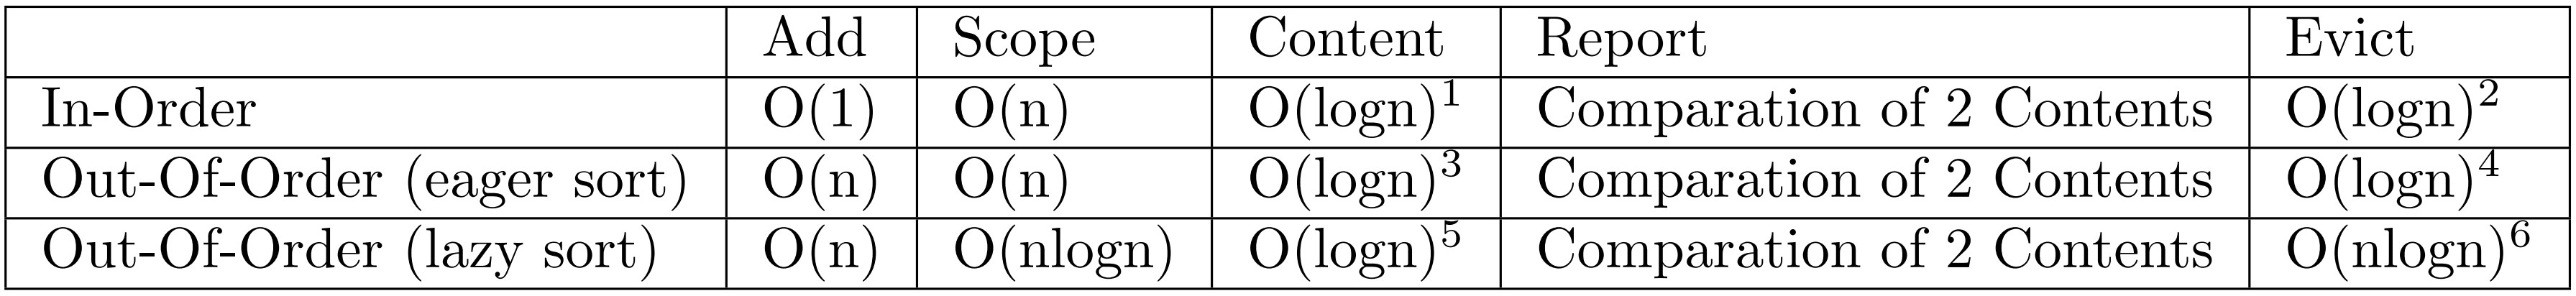
n = size of buffer

## In-Order

### CSV load
Select the path of the csv representing the execution

In [8]:
csv_name = 'threshold200000_single.csv'
csv_path = '/content/drive/My Drive/cframes/' + csv_name

### Plot creation
Comparison against the linear function to compare different complexities among functions

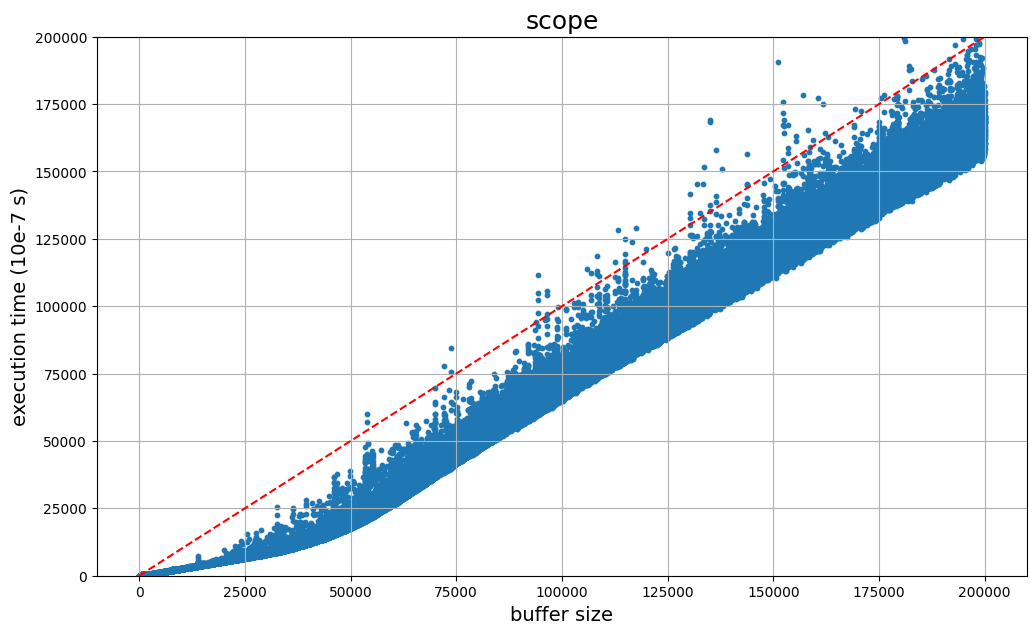

In [68]:
df = pd.read_csv(csv_path)
df['time'] = df['time'] * 10000000

unique_actions = df['action'].unique()

for action in unique_actions:
    if action == "scope":
        plt.figure(figsize=(12, 7))

        subset = df[df['action'] == action]
        plt.scatter(subset["n"], subset["time"], s=10, label = action)

        x = np.linspace(min(subset["n"]), max(subset["n"]), 100)
        plt.plot(x, x, label="y=x", linestyle='--', color='red')

        plt.xlabel("buffer size", fontsize=14)
        plt.ylabel("execution time (10e-7 s)", fontsize=14)
        plt.title(f"{action}", fontsize=18)
        plt.grid(True)
        plt.ylim(-0.001, 200000)
        plt.show()


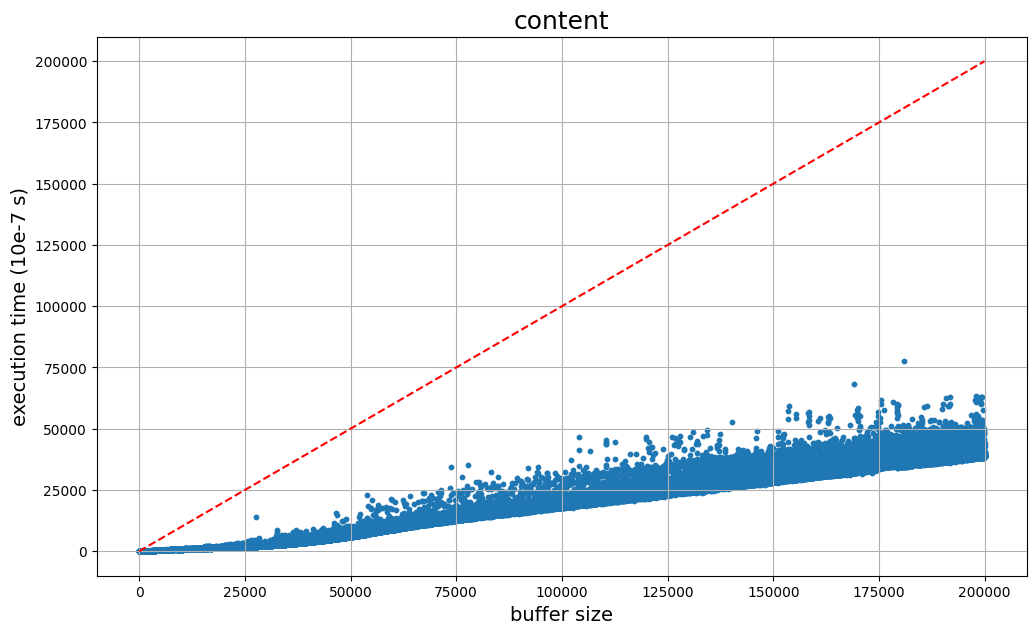

In [75]:
df = pd.read_csv(csv_path)
df['time'] = df['time'] * 10000000

unique_actions = df['action'].unique()

for action in unique_actions:
    if action == "content":
        plt.figure(figsize=(12, 7))

        subset = df[df['action'] == action]

        plt.scatter(subset["n"], subset["time"], s=10, label = action)

        x = np.linspace(min(subset["n"]), max(subset["n"]), 100)
        y = x
        plt.plot(x, y, label="y=x", linestyle='--', color='red')

        plt.xlabel("buffer size", fontsize=14)
        plt.ylabel("execution time (10e-7 s)", fontsize=14)
        plt.title(f"{action}", fontsize=18)
        plt.grid(True)
        plt.show()


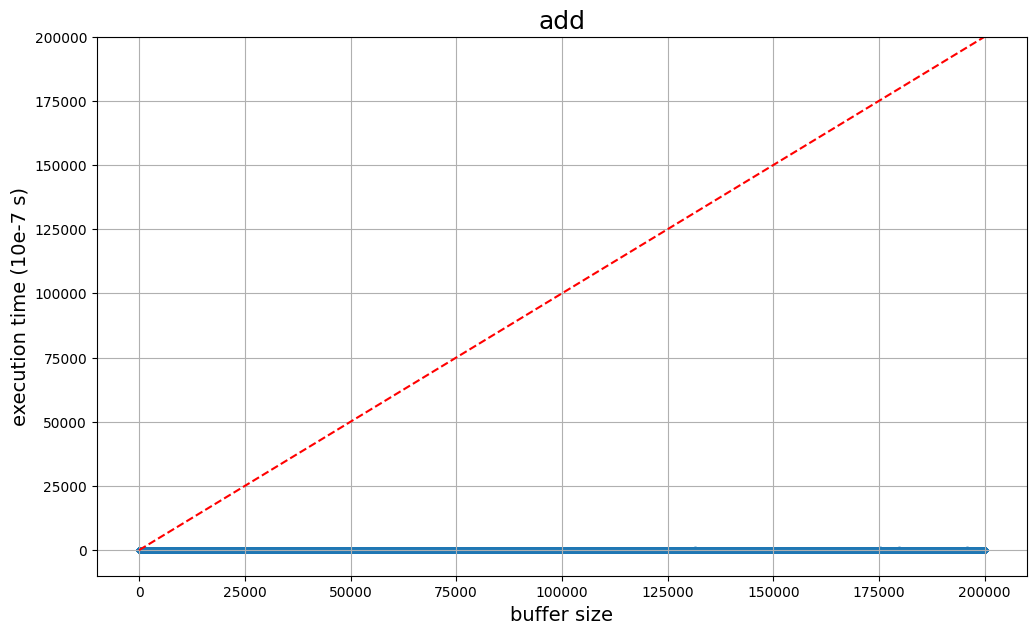

In [73]:
df = pd.read_csv(csv_path)
df['time'] = df['time'] * 10000000

# Ottieni un elenco delle "action" uniche
unique_actions = df['action'].unique()

# Crea un grafico separato per ciascuna "action"
for action in unique_actions:
    if action == "add":
        plt.figure(figsize=(12, 7))  # Imposta le dimensioni del grafico

        # Filtra i dati solo per l'azione corrente
        subset = df[df['action'] == action]

        plt.scatter(subset["n"], subset["time"], s=10, label = action)  # Plotta i dati
        # Sovrapponi la funzione y = x per l'"action" specifica

        x = np.linspace(min(subset["n"]), max(subset["n"]), 100)
        y = x
        plt.plot(x, y, label="y=x", linestyle='--', color='red')

        plt.xlabel("buffer size", fontsize=14)  # Etichetta dell'asse X con dimensione del carattere 22
        plt.ylabel("execution time (10e-7 s)", fontsize=14)  # Etichetta dell'asse Y con dimensione del carattere 22
        plt.title(f"{action}", fontsize=18)  # Titolo del grafico con dimensione del carattere 22
        plt.grid(True)  # Abilita la griglia
        plt.ylim(-10000, 200000)  # Imposta un limite logaritmico
        plt.show()  # Mostra il grafico


## Out-of-Order (eager sort)

### CSV load

In [ ]:
csv_name = 'threshold24000_single_ooo_e.csv'
csv_path = '/content/drive/My Drive/cframes/' + csv_name

### Plot creation

In [ ]:
df = pd.read_csv(csv_path)

plt.figure(figsize=(12, 7))

for action, group_data in df.groupby("action"):
    plt.scatter(group_data["n"], group_data["time"], label=action, s=10)

plt.xlabel("elements in the buffer", fontsize=12)
plt.ylabel("time elapsed (s)", fontsize=12)
plt.legend(fontsize=12)

plt.ylim(0, 0.0010)

plt.tick_params(axis='both', labelsize=12)

plt.grid(True)

# Multi-Buffer

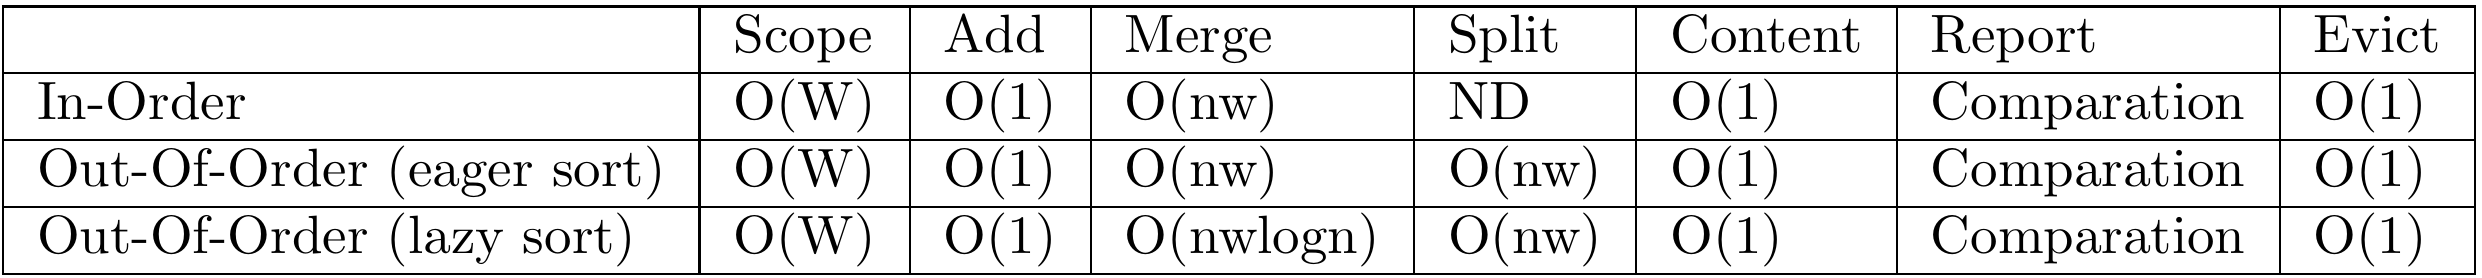
n = size of buffer, w = number of buffers, W = w + freshly created buffers

### Implementation
At tuple arrival, traverse all the existing frames in *O(W)*, find the respective frame and add the tuple to it in *O(1)*. \
**Data Structure:**
An array of lists, each element represents a frame, points to the list of tuples contained into the frame. Array access in *O(1)*.

## In-Order